# Scanning Tunneling Microscopy

<strong>Scanning Tunneling Microscopy</strong> (STM) has emerged as a groundbreaking imaging technique within the field of nanotechnology, achieving unprecedented resolution at the atomic and molecular levels. Originating in 1981 through the pioneering work of Gerd Binnig and Heinrich Rohrer, Nobel laureates in Physics  [\[1\]](#Bibliography).

STM relies on the meticulous scanning of a sharp metallic tip in close proximity to a sample surface. Leveraging the principles of tunneling current, a quantum mechanical phenomenon, this method empowers scientists to not only observe but also manipulate individual atoms  [\[2\]](#Bibliography).

Its widespread applications across physics, chemistry, and materials science have revolutionized our understanding of surface structures, electronic properties, and the intricate world of nanoscale phenomena. Operating as a non-optical technique, STM stands as an indispensable tool for the precise investigation and manipulation of matter, opening new frontiers in the exploration of nanomaterials and nanodevices.

    In this notebook we discuss the basic theory explaining the working mechanism of STM and measurements that it can be done. 

In scanning tunneling microscopy, piezo-elements maneuver a metal tip across the surface of a sample (see Fig 1a). Due to an applied voltage and the small distance between the tip and sample (a few angstroms), it becomes possible to measure a tunneling current.

    STM can be operated in three major operation modes: (1) imaging mode, (2) spectroscopy mode, and (3) manipulation mode.

(1) The scanning of the sample can be executed in two imaging modes for studeing of surface morphology with atomic resolution: constant-height or constant-current modes:

In the more commonly used *constant-current* mode (Fig.1(b)) a feedback loop provides a constant tunnel current between tip and sample at every position $(x,y)$. This means that the $z$-position of the tip has to be adjusted during scanning which is done by applying an appropriate voltage $V_{z}$ to the $z$-piezo of the tube scanner.
      
In *constant-height* mode (Fig.1(c)) the vertical position $z$ of the tip is held constant while scanning and the varying tunnel current between tip and sample is measured.


(2) I-z spectroscopy (Vbias - const) is useful for the characterization of the quality of the STM tip, its sharpness and cleanliness. 

Tunneling spectroscopy as a function of the bias voltage, i.e., I-V curves, provides
very important information about the surface electronic structure, such as the barrier
heights and LDOS of the sample. While the experimental procedures is very similar for
large variety of sample systems, i.e., the current is measured as a function of Vbias. 
I-V spectroscopy offers with a first order analysis information about the electronics structure, and a second order analysis information vibrational mobilities.  


<img src="scheme_STM_19_02.png" alt="STM_scheme_last.png" width="80%"  />

#### Fig.1  Schematic illustration of basic component of STM (a)  and STM operating modes: constant-current (b) and constant-height (c) modes. 

In Fig.1. STM images of the $Bi_{2}Se_{3}$ surface with a Co adatom deposited on it are presented in both 3D (a) and 2D projections (b). The sample bias is set to $V = 300mV$, and the tunneling current is $I_{t} = 0.10n\AA$. This material is of interest for the development of topological insulators, which are supposed to be used, for example, in quantum computers as information carriers.  [\[3\]](#Bibliography); 

## Tunneling throught a one-dimentional potential barrier

Describe briefly elementary theories of tunneling through a one dimentional potential barrier, which will help us to understande the basic concept used in STM.

Here we describe briefly elementary theories of tunneling through a one-dimensional potential
barrier, which will help us to grasp the basic concept used in STM. In quantum mechanics, the
electron feeling a potential $U(z)$, see Fig. 2(b), is described by a wave function $\psi(z)$, which satisfies the Schrödinger equation,

$$\frac{-\hbar^2}{2m}\frac{d^2\psi(z)}{dz^2} + U(z)\psi(z) = E\psi(z)$$

where $\hbar$ is the reduced Planck’s constant, $m$ is the mass of the electron, $E$ is its energy and $z$ its position. For simplicity, the one-dimensional case is considered, where the vacuum is modeled by the potential barrier $U$.


<img src="Fig_2_20_02.png" alt="Consept ot Tunneling" width="30%"  />

#### Fig.2  A schematic showing some of the principles of electron tunneling with energy diagram in case of negative voltages. Where $V$ is applied bias, $e$ is the elementary charge, $I$ is current, $z$ is vertical distance, $E_{F}$ is Fermi level, $\Phi_{t}$, $\Phi_{s}$ are work functions of materials of tip and sample, respectively.

$$ I_{t} \sim I_0 \exp\left(-\frac{2d  \sqrt{2m_e(\phi -  V)}}{\hbar}\right) $$

$I_0$  is a prefactor that depends on the material properties.

$d$  is the tip-sample distance.

$m_{e}$  is the effective mass of the tunneling electrons.

$\phi$  is the work function of the material.

$V$  is the applied voltage.

$\hbar$  is the reduced Planck's constant.

$k$  is the tunneling attenuation constant.



0.9999999999999946


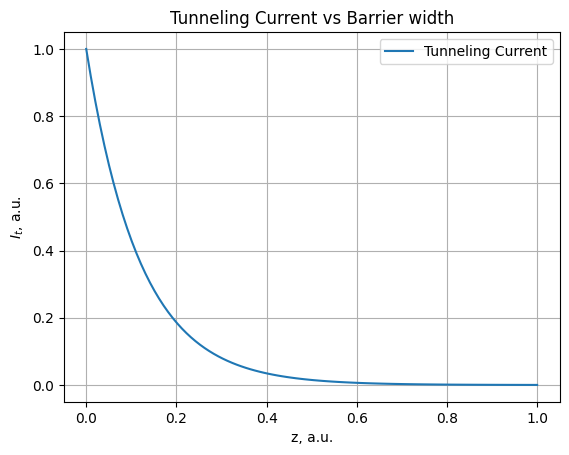

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

# Using parameters
I0 = 1.0  # Adjust as needed
m = 9.11e-31 # Electron mass in kg
phi = 4.5  # Work function
V = 0.3 # Applied voltage in V
# z0 = 0.1  # Initial tip-sample separation

k = np.exp(-2 * np.sqrt(2 * m * (phi - V))) # the tunneling attenuation constant
print (k)

# Calculate the varying tip-sample separation (distance) from the surface profile
d = np.linspace(0, 1, 100)
tunneling_current = I0 * np.exp(-2 * np.sqrt(2 * m * (phi - V)) * d / 6.5821e-16) # redused Planck constant in 6.5821e-16 eV*s or 1.054e-34 J*s


# Plot the results
plt.plot(d, tunneling_current,label='Tunneling Current')
plt.xlabel('z, a.u.')
plt.ylabel('$I_{t}$, a.u.')
plt.title('Tunneling Current vs Barrier width')
plt.legend()
plt.grid(True)
plt.show()

The tunneling current decays exponentially with the distance gap distance z, and
is strongly affected by the density of states (DOS) of the sample at the Fermi level,

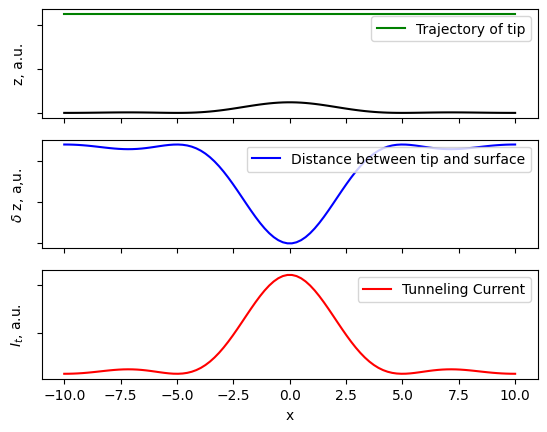

In [3]:
"""
    Using analitical solutions to find the tunnel current through a one-dimensional potential barrier :

    - dependence of the tunnel current on the distance between the tip and the surface of the sample (Fig.1c);

"""

# Surface profile function sinc^2(x)
# Parameters for scaling and shifting
width_scaling_factor = 0.2 # Adjust this value to widen or narrow the peak
height_scaling_factor = 0.3  # Adjust this value to lower or raise the entire function

def surface_profile(x):
    return height_scaling_factor * (width_scaling_factor * np.sinc(width_scaling_factor * x))**2


x_values = np.linspace(-10, 10, 100)

profile = height_scaling_factor * (width_scaling_factor * np.sinc(width_scaling_factor * x_values))**2
z0 = np.max(profile) + 0.1 # distance between the tip and sample's surface
z_values = z0 - surface_profile(x_values) 

# Calculate tunneling current at each position x
tunneling_current_surface = I0 * np.exp(-2 * np.sqrt(2 * m * (phi - V)) * z_values / 6.58e-16) #6.58e-16eV 1.054e-34


# Create a figure with two subplots stacked vertically
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True)

# Plot: Distance between tip and surface
ax0.plot(x_values, profile, color='black') #label='Distance between tip and surface',
ax0.plot(x_values, z0 * np.ones_like(x_values), label='Trajectory of tip', color='green' )  # Plotting z0(x)

ax0.set_ylabel('z, a.u.')
ax0.set_yticklabels([])
ax0.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Plot: Distance between tip and surface
ax1.plot(x_values, z_values, label='Distance between tip and surface', color='blue') #
ax1.set_ylabel('$\delta$ z, a,u.')
ax1.set_yticklabels([])
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Plot the results for power-law relationship on the second subplot
ax2.plot(x_values, tunneling_current_surface, label='Tunneling Current', color='red')
ax2.set_xlabel('x, $\AA$ ')
ax2.set_yticklabels([])
ax2.set_ylabel('$I_{t}$, a.u.')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))

# plt.suptitle('Tunneling Current vs Tip-Sample Separation')
plt.show()

STM constant current maps provide information about the variations in the
electron density, and do not necessarily correspond to the location of atoms (nuclei). 


$$d(x)=− \frac{\hbar}{2κ} \ln\left(\frac{I_{t}(x)}{I_0}\right) $$

$I_{t}$ is the tunneling current.

$I_0$  is a prefactor that depends on the material properties.

$d$  is the tip-sample distance.

$k$  is the tunneling attenuation constant.

$\hbar$  is the reduced Planck's constant.



0.01


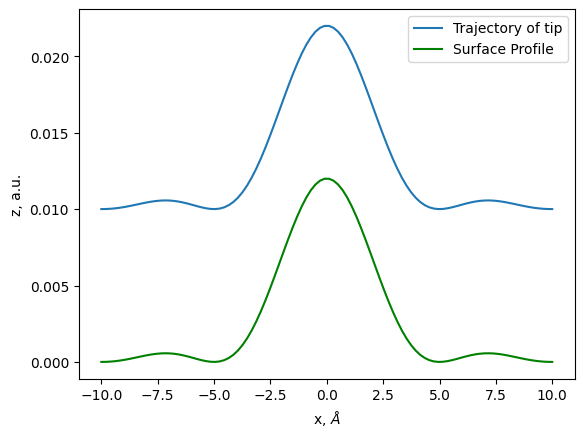

In [29]:
"""
    Using analitical solutions to find the coordinate a one-dimensional potential barrier :

    - dependence of the posution z of the tip ander the surface at tunneling current and distance const (Fig.1b)  

"""
# Constants
I0 = 1.0e-9# Constant tunneling current
It = 0.1e-9
d = 0.01

k = np.exp(-2 * np.sqrt(2 * m * (phi - V))) # the tunneling attenuation constant    6.5821e-16 eV*s

# Function for the surface profile (replace with your specific profile)
def surface_profile(x):
    return height_scaling_factor * (width_scaling_factor * np.sinc(width_scaling_factor * x))**2  # Example: sine wave profile

# Generate x values for the surface profile
x_values = np.linspace(-10, 10, 100)

# Generate tunneling current values (constant)
z0 = surface_profile(x_values)

# Generate tip-sample distance values (constant)
# d = (-6.5821e-16 / 2*k) * np.log(It / I0)
z = z0 + d
print (d)

# Plotting
plt.plot(x_values, z, label='Trajectory of tip')
plt.plot(x_values, z0, label='Surface Profile', color='green')

plt.xlabel('x, $\AA$')
plt.ylabel('z, a.u.')
plt.title('')
plt.legend()
plt.show()

STM plays with the very top (outermost) atom at the tip and the
nearest atom on sample; so the whole tip is not necessarily very sharp
in shape, different from the case of AFM, where spatial “contact” is
necessary and crucial for feedback.
How do we obtain these wonderful tunneling tips where only one
atom is at the top?
Answer: really easy to obtain such tips, simply by cutting a thin metal
wire using a wire cutter --- there is always a single atom left over at the
very top.

• STM does NOT probe the nuclear position directly, but rather it is a probe of the
local density of electronic states , so STM images do not always show the
position of the atoms. STM imaging depends on the nature of the surface and the
magnitude and sign of the tunneling current. 

### Bibliography

[1] G. Binnig, H. Rohrer, Scanning tunneling microscopy, Physica B+C, Volume 127, Issues 1–3, 1984, P.37-45. https://doi.org/10.1016/S0378-4363(84)80008-X.

[2] S. Lounis, Theory of Scanning Tunneling Microscopy, arXiv:1404.0961, 2014. https://doi.org/10.48550/arXiv.1404.0961.

[3] M. Ye, S. Eremeev, K. Kuroda et al, Quasiparticle interference on the surface of 3D topological insulator $Bi_{2}Se_{3}$ induced by cobalt adatom in the absence of ferromagnetic ordering,  arXiv:1112.3206, 2011. https://doi.org/10.48550/arXiv.1112.3206.
